In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#设置绘图风格
plt.style.use('dark_background')

In [3]:
import numpy as np

x = np.linspace(0,10,100)
fig = plt.figure()
plt.plot(x, np.sin(x),'-')
plt.plot(x, np.cos(x),'--')

In [4]:
#保存成文件
fig.savefig('my_figure.png')

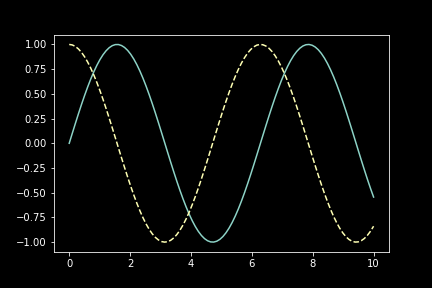

In [5]:
#读取保存文件
from IPython.display import Image
Image('my_figure.png')

In [6]:
#查看支持的所有格式
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## 两种画图接口
### MATLAB风格接口

In [7]:
#位于pyplot(plt)接口中

plt.figure()#创建图形

#创建两个子图中的第一个，设置坐标轴
plt.subplot(2,1,1)
plt.plot(x,np.sin(x))

#创建两个子图中的第二个，设置坐标轴
plt.subplot(2,1,1)
plt.plot(x,np.cos(x))


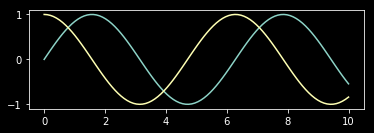

In [8]:
#获取当前图形
plt.gcf()

In [9]:
#获取当前坐标
plt.gca()

### 面向对象的接口

In [10]:
#先创建图形网络
fig,ax = plt.subplots(2)

#每个对象上调用plot()方法
ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))


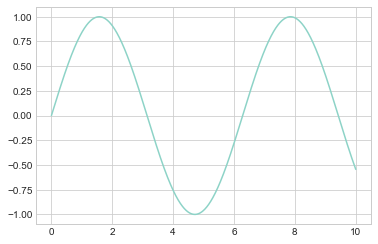

In [11]:
#方程y = f(x)
%matplotlib inline
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0,10,1000)
ax.plot(x,np.sin(x)) #plot(x,y)分别是x的值,y轴的值

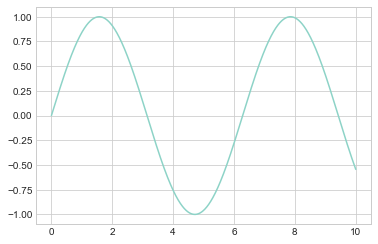

In [12]:
#也可以用pylab接口作图
plt.plot(x, np.sin(x))

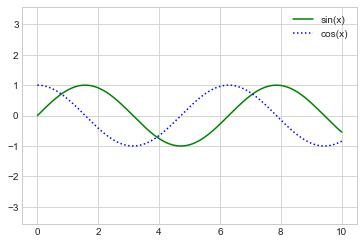

In [13]:
#同一张图里创建多条线
plt.plot(x, np.sin(x),'-g',label='sin(x)')
plt.plot(x, np.cos(x),':b',label='cos(x)')
#设置极值
plt.axis([0,12,-1,2])
#自动设置极值,不留空隙
plt.axis('tight')
#设置横竖坐标相等
plt.axis('equal')

plt.legend()#标签和风格自动匹配，必须要有

## 利用对象方法一次性设置

[(-2, 2),
 (0, 10),

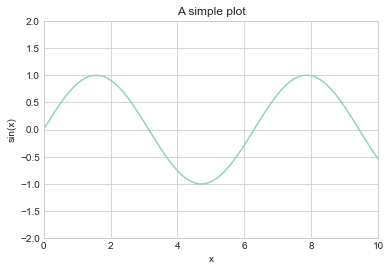

In [14]:
ax = plt.axes()
ax.plot(x,np.sin(x))
ax.set(xlim=(0,10),ylim=(-2,2),
       xlabel='x',ylabel='sin(x)',
       title='A simple plot'
      )

## 简易的散点图,方式一

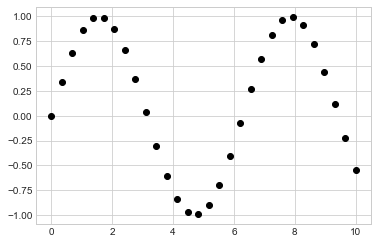

In [15]:
x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y,'o',color='black')

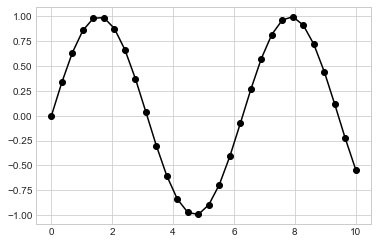

In [16]:
plt.plot(x,y,'-ok')

(-1.2, 1.2)

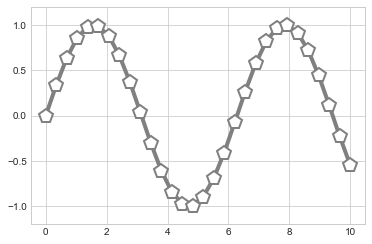

In [17]:
plt.plot(x,y,'-p',color='gray',markersize=15,linewidth=4,markerfacecolor='white',markeredgecolor='gray',markeredgewidth=2)
plt.ylim(-1.2,1.2)

## 创建散点图方式二 plt.scatter

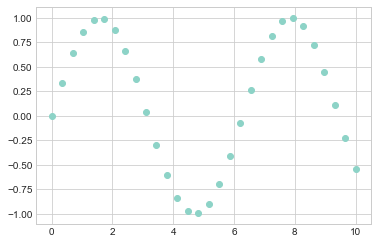

In [18]:
plt.scatter(x,y,marker='o')

plt.scatter与plt.plot的主要差别在于，前者在创建散点图时具有更高的灵活性，可以单独控制每个散点与数据匹配，也可以让每个散点具有不同的属性。

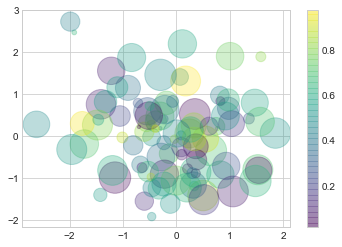

In [19]:
rng = np.random.RandomState(42)
x = rng.randn(100) #正态分布
y = rng.randn(100)
colors = rng.rand(100)#随机分布
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar() #显示颜色条

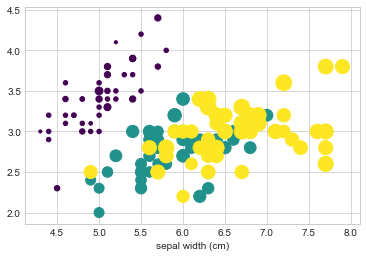

In [20]:
#scikit-learn鸢（yuan）尾花数据集
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0],features[1],alpha=2,
           s=100 * features[3],c=iris.target,cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.xlabel(iris.feature_names[1])


In [21]:
dir(iris)#获取所有方法和属性

['DESCR', 'data', 'feature_names', 'target', 'target_names']

## 密度图和等高线图

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [23]:
def f(x,y):
    return np.sin(x)**10 + np.cos(10+y*x)* np.cos(x)

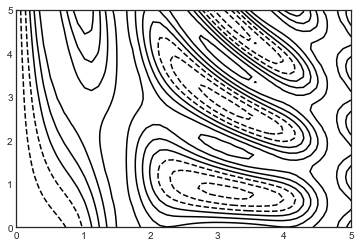

In [24]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.contour(X,Y,Z,colors='black')#一维数组构建二维网格数据

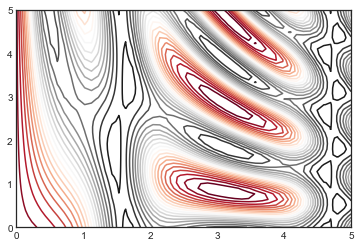

In [27]:
#将数据范围分为20等份
plt.contour(X,Y,Z,20,cmap='RdGy')

In [28]:
plt.cm.Greens_r#通过tab获取配色方案

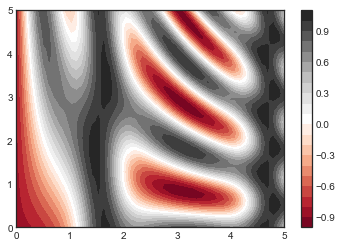

In [30]:
#通过plt.contourf()函数来填充等高线
plt.contourf(X,Y,Z,20,cmap='RdGy')
plt.colorbar()#右侧的颜色bar

(0.0, 5.0, 0.0, 5.0)

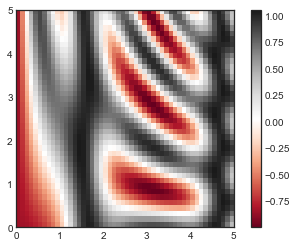

In [31]:
#黑色区域波峰，红色区域波谷
plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy')
plt.colorbar()
plt.axis(aspect='iamge')

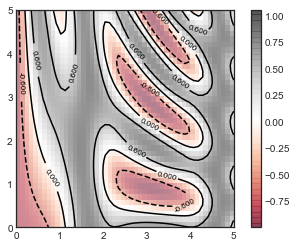

In [32]:
#重新渲染三维彩色图
contours = plt.contour(X,Y,Z,3,colors='black')
plt.clabel(contours,inline=True,fontsize=8)

plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy',alpha=0.5)
plt.colorbar()

将plt.contour、plt.contourf与plt.imshow组合在一起能够形成很复杂的图像

## 频次直方图、数据区间划分和分布密度

(array([  5.,  22.,  64., 172., 254., 237., 169.,  58.,  17.,   2.]),
 array([-3.23878045, -2.57712901, -1.91547757, -1.25382612, -0.59217468,
         0.06947676,  0.7311282 ,  1.39277965,  2.05443109,  2.71608253,
         3.37773397]),
 <a list of 10 Patch objects>)

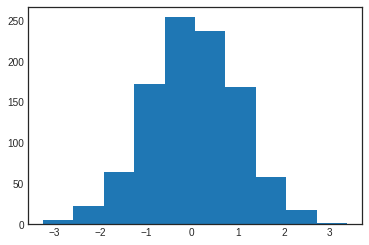

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

plt.hist(data)

/home/mj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00453411, 0.01360233, 0.00453411, 0.01360233, 0.04534109,
        0.04080698, 0.05440931, 0.11788684, 0.11788684, 0.26297834,
        0.24484191, 0.27204656, 0.3400582 , 0.4352745 , 0.37633108,
        0.37179697, 0.34912642, 0.35366053, 0.30378533, 0.28564889,
        0.17683027, 0.11335273, 0.0952163 , 0.05440931, 0.04080698,
        0.02267055, 0.01360233, 0.00453411, 0.        , 0.00453411]),
 array([-3.23878045, -3.01822997, -2.79767949, -2.57712901, -2.35657853,
        -2.13602805, -1.91547757, -1.69492709, -1.4743766 , -1.25382612,
        -1.03327564, -0.81272516, -0.59217468, -0.3716242 , -0.15107372,
         0.06947676,  0.29002724,  0.51057772,  0.7311282 ,  0.95167868,
         1.17222916,  1.39277965,  1.61333013,  1.83388061,  2.05443109,
         2.27498157,  2.49553205,  2.71608253,  2.93663301,  3.15718349,
         3.37773397]),
 <a list of 1 Patch objects>)

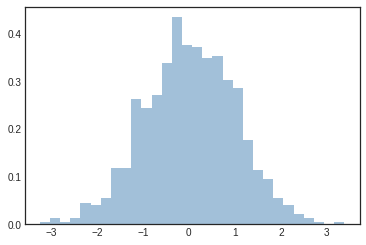

In [2]:
plt.hist(data,bins=30,normed=True,alpha=0.5,
        histtype='stepfilled',color='steelblue',
        edgecolor='none')

/home/mj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00287043, 0.00287043, 0.        , 0.00574086, 0.        ,
        0.00574086, 0.00574086, 0.00574086, 0.020093  , 0.01435214,
        0.03731557, 0.06314942, 0.06314942, 0.05166771, 0.10046499,
        0.12055799, 0.13778056, 0.1521327 , 0.20380041, 0.19518912,
        0.21815255, 0.21241169, 0.21815255, 0.19231869, 0.12916927,
        0.1320397 , 0.14639184, 0.10333542, 0.0918537 , 0.07750156,
        0.05453814, 0.04305642, 0.020093  , 0.01148171, 0.01148171,
        0.01435214, 0.        , 0.00287043, 0.        , 0.00287043]),
 array([-4.37393786, -4.02555779, -3.67717772, -3.32879765, -2.98041758,
        -2.63203751, -2.28365743, -1.93527736, -1.58689729, -1.23851722,
        -0.89013715, -0.54175708, -0.19337701,  0.15500306,  0.50338313,
         0.85176321,  1.20014328,  1.54852335,  1.89690342,  2.24528349,
         2.59366356,  2.94204363,  3.2904237 ,  3.63880377,  3.98718384,
         4.33556392,  4.68394399,  5.03232406,  5.38070413,  5.7290842 ,
         6.07746

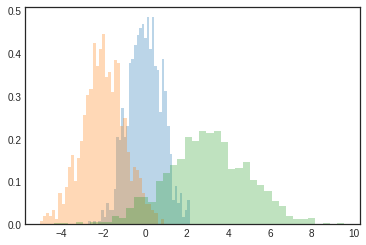

In [3]:
#alpha=0.5,histtype='stepfilled'搭配会很好用
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

kwargs = dict(histtype='stepfilled',alpha = 0.3,normed=True,bins=40)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs)


In [4]:
## 如果是简单计算频次直方图可以用np.histogram()
counts, bin_edges = np.histogram(data, bins=5)
counts

array([ 27, 236, 491, 227,  19])

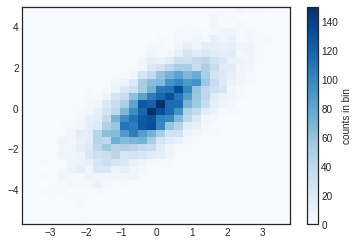

In [5]:
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,10000).T

plt.hist2d(x,y,bins=30,cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

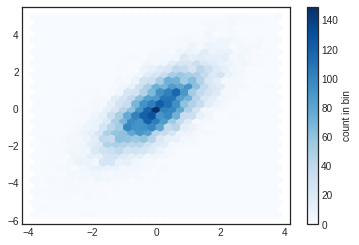

In [6]:
#六边形的方法
plt.hexbin(x,y,gridsize=30,cmap='Blues')
cb = plt.colorbar(label='count in bin')

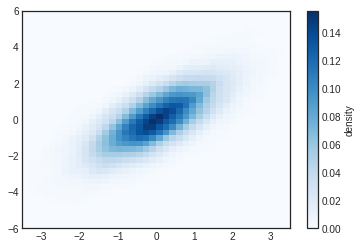

In [7]:
#一种评估多维数据分布密度的常用方法（核密度估计）KDE

from scipy.stats import gaussian_kde

#拟合数组维度
data = np.vstack([x,y])
kde = gaussian_kde(data)

#用一对规则的网格数据进行拟合
xgrid = np.linspace(-3.5,3.5,40)
ygrid = np.linspace(-6,6,40)
Xgrid,Ygrid = np.meshgrid(xgrid,ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

#画出结果图
plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower',aspect='auto',
          extent=[-3.5,3.5,-6,6],
          cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')


## 选择图例显示的元素

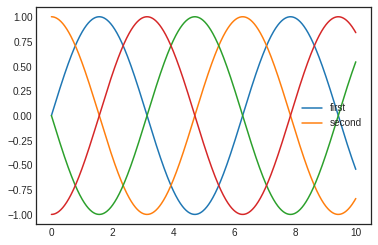

In [16]:
x = np.linspace(0,10,1000)
y = np.sin(x[:,np.newaxis] + np.pi * np.arange(0,2,0.5))
lines = plt.plot(x,y)

#lines变量是一组plt.line2D实例
plt.legend(lines[:2],['first','second'])

## 图例中显示不同尺寸的点

Text(0.5,1,'California Cities: Area and Population')

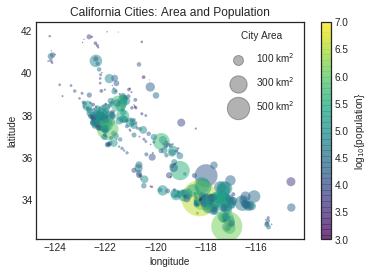

In [20]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

#提取感兴趣的数据
lat,lon = cities['latd'],cities['longd']
population,area = cities['population_total'],cities['area_total_km2']

#用不同尺寸和颜色的散点图表示数据，但不带标签
plt.scatter(lon,lat,label=None,
            c=np.log10(population),cmap='viridis',
            s=area,linewidth=0,alpha=0.5
           )
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}${population}')
plt.clim(3,7)

#下面创建一个图例
for area in [100,300,500]:
    plt.scatter([],[],c='k',alpha=0.3,s=area,label=str(area)+' km$^2$')

plt.legend(scatterpoints=1,frameon=False,labelspacing=1,title='City Area')
plt.title('California Cities: Area and Population')